In [1]:
import random
from datetime import datetime, timedelta

import pandas as pd
from pandas import DataFrame

from utils import determine_season, determine_time_of_day

In [2]:
# Function to add random noise
def add_minimum_randomness_to_base_power_rating(value, noise_level=0.03):
    noise = random.uniform(-noise_level, noise_level)
    return max(0, value + noise)  # Ensure the final value is not negative


In [3]:
# Base power rating of the device in kW (kilowatts)
base_power_rating = 0.5  # 500 watts

# Factors to adjust power usage
time_of_day_factors = {"morning": 0.9, "afternoon": 1.1, "evening": 1.0, "night": 0.8, "midnight": 0.7}
seasonal_factors = {"spring": 1.0, "summer": 1.15, "monsoon": 0.9, "winter": 1.1}
weekday_factors = {"weekday": 1.0, "weekend": 0.7}

In [4]:
# Generate data for one week
start_date = datetime.now()
data = []
for i in range(365*5*24):  # 7 days, 24 hours each
    current_time = start_date + timedelta(hours=i)
    season = determine_season(current_time)  # Random season
    time_of_day = determine_time_of_day(current_time)  # Random time of day
    weekday_or_weekend = "weekend" if current_time.weekday() >= 5 else "weekday"
    
    # # Add minimal randomness to the base power rating
    minimal_noise = add_minimum_randomness_to_base_power_rating(base_power_rating, noise_level=0.03)
    
    # Adjust power rating
    adjusted_power = base_power_rating * time_of_day_factors[time_of_day] * seasonal_factors[season] * weekday_factors[weekday_or_weekend] * minimal_noise


    print("Current time: ", current_time)
    print("Base power rating: ", base_power_rating, "kW")
    print("Time of day factor: ",time_of_day,"-", time_of_day_factors[time_of_day])
    print("Seasonal factor: ",season,"-", seasonal_factors[season])
    print("Weekday or weekend factor: ",weekday_or_weekend,"-", weekday_factors[weekday_or_weekend])
    print("Minimal noise: ",minimal_noise)
    print("Adjusted power rating: ",adjusted_power, "kW\n")

    # Assuming the device runs for the entire hour
    energy_consumed = adjusted_power  # in kWh

    data.append({
        "timestamp": current_time,
        "season": season,
        "time_of_day": time_of_day,
        "weekday_or_weekend": weekday_or_weekend,
        "energy_consumed": energy_consumed
    })

df = pd.DataFrame(data)

Current time:  2023-12-09 16:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  afternoon - 1.1
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.48259602441595906
Adjusted power rating:  0.2043794163401587 kW

Current time:  2023-12-09 17:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.4747161147322678
Adjusted power rating:  0.18276570417192312 kW

Current time:  2023-12-09 18:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.48638801894118844
Adjusted power rating:  0.18725938729235755 kW

Current time:  2023-12-09 19:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.4874770601896808
Adjus

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Weekday or weekend factor:  weekday - 1.0
Minimal noise:  0.4870237085119686
Adjusted power rating:  0.24107673571342447 kW

Current time:  2028-12-04 07:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  morning - 0.9
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekday - 1.0
Minimal noise:  0.5272586614398874
Adjusted power rating:  0.2609930374127443 kW

Current time:  2028-12-04 08:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  morning - 0.9
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekday - 1.0
Minimal noise:  0.4847302647775384
Adjusted power rating:  0.23994148106488153 kW

Current time:  2028-12-04 09:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  morning - 0.9
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekday - 1.0
Minimal noise:  0.47761220772929586
Adjusted power rating:  0.23641804282600148 kW

Current time:  2028-12-04 10:18:57.250037
Base power rating:  0.5 kW
Time of day factor:  morni

In [5]:
df.head(25)

,timestamp,season,time_of_day,weekday_or_weekend,energy_consumed
0,2023-12-09 16:18:57.250037,winter,afternoon,weekend,0.204379
1,2023-12-09 17:18:57.250037,winter,evening,weekend,0.182766
2,2023-12-09 18:18:57.250037,winter,evening,weekend,0.187259
3,2023-12-09 19:18:57.250037,winter,evening,weekend,0.187679
4,2023-12-09 20:18:57.250037,winter,night,weekend,0.148519
5,2023-12-09 21:18:57.250037,winter,night,weekend,0.150249
6,2023-12-09 22:18:57.250037,winter,night,weekend,0.150706
7,2023-12-09 23:18:57.250037,winter,night,weekend,0.146037
8,2023-12-10 00:18:57.250037,winter,midnight,weekend,0.136028
9,2023-12-10 01:18:57.250037,winter,midnight,weekend,0.131405


In [6]:
from utils import save_dataframe_in_csv

save_dataframe_in_csv(df, "generated")

In [7]:
df.describe()

,timestamp,energy_consumed
count,43800,43800.000000
mean,2026-06-09 03:48:57.250037504,0.208757
min,2023-12-09 16:18:57.250037,0.103637
25%,2025-03-09 22:03:57.250036992,0.170051
50%,2026-06-09 03:48:57.250036992,0.203566
75%,2027-09-08 09:33:57.250036992,0.245342
max,2028-12-07 15:18:57.250037,0.335219
std,NaN,0.051675


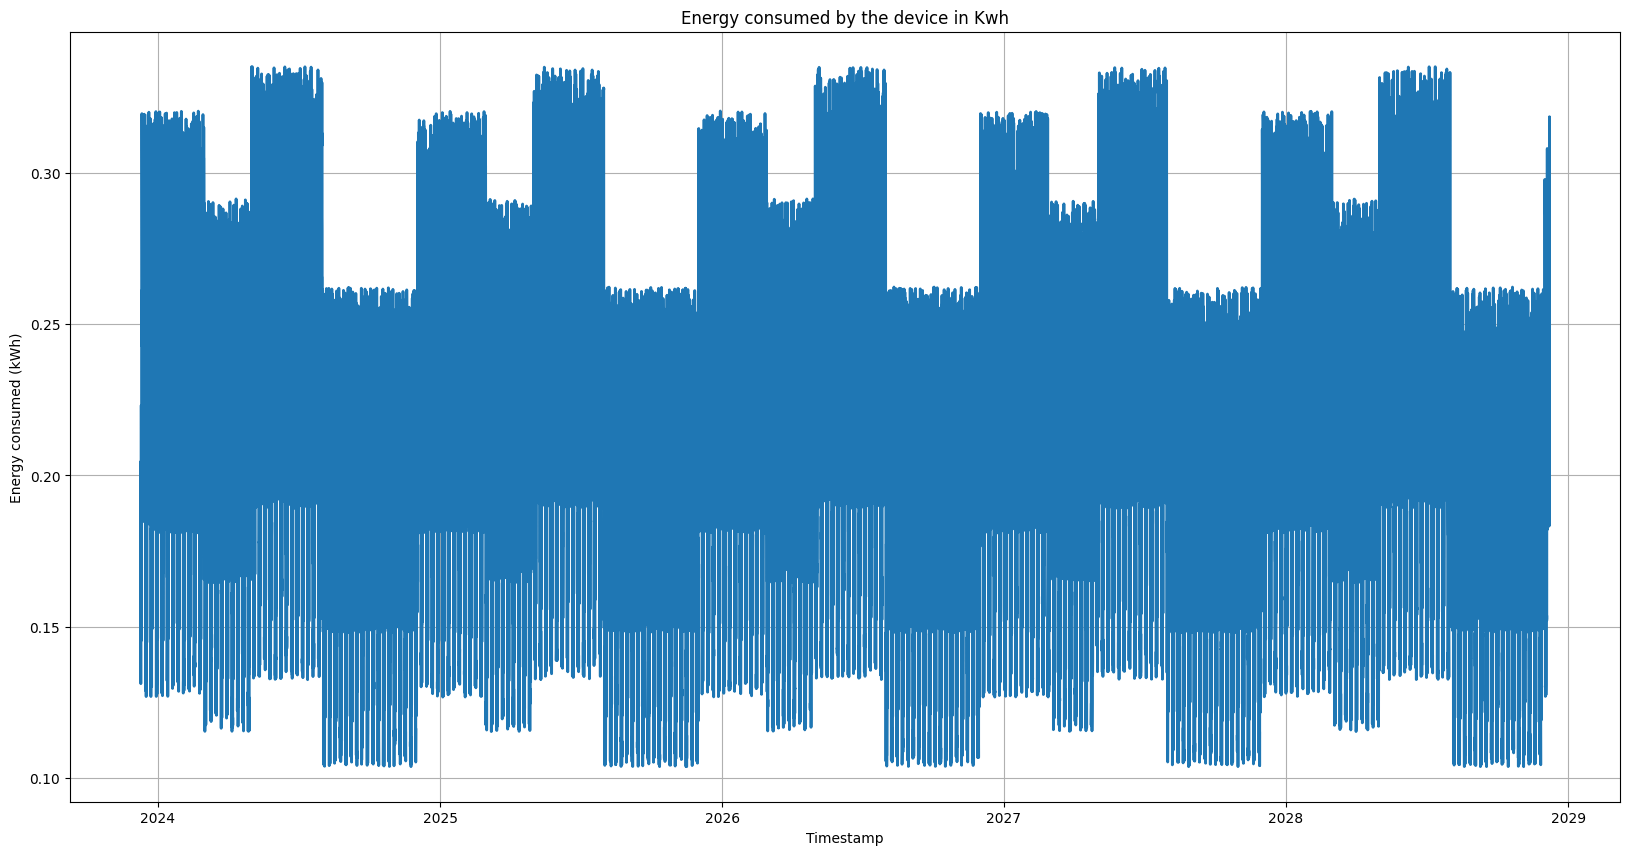

In [8]:
# Plot the  energy consumed as the y-axis and the timestamp as the x-axis
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df["timestamp"], df["energy_consumed"], linestyle="solid", linewidth=2, markersize=12)

plt.xlabel("Timestamp")
plt.ylabel("Energy consumed (kWh)")
plt.title("Energy consumed by the device in Kwh")
plt.grid()
plt.show()


In [9]:
## Training and testing data
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [10]:
# Split the data
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]


In [11]:
# Print the shapes of the datasets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (35040, 5)
Testing set shape: (8760, 5)


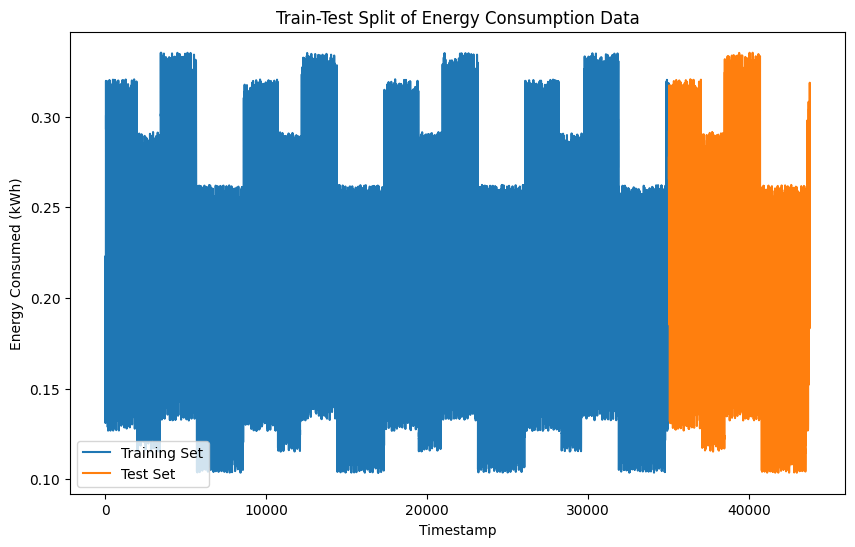

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['energy_consumed'], label='Training Set')
plt.plot(test_df.index, test_df['energy_consumed'], label='Test Set')
plt.title('Train-Test Split of Energy Consumption Data')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['energy_consumed'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -23.083849
p-value: 0.000000
Series is stationary


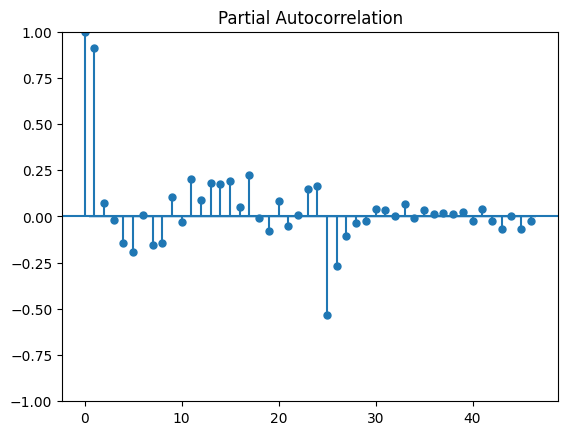

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(train_df['energy_consumed'])
plot_pacf(train_df['energy_consumed'])
plt.show()


In [15]:
# import pmdarima as pm
# 
# auto_model = pm.auto_arima(train_df['energy_consumed'], seasonal=False, stepwise=True)
# print(auto_model.summary())
# The output of the above code is(5,1,5)
# SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                35040
# Model:               SARIMAX(5, 1, 5)   Log Likelihood               86856.778
# Date:                Fri, 08 Dec 2023   AIC                        -173691.557
# Time:                        17:40:51   BIC                        -173598.451
# Sample:                             0   HQIC                       -173661.902
# - 35040
# Covariance Type:                  opg
# ==============================================================================
# coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0276      0.011     -2.554      0.011      -0.049      -0.006
# ar.L2          0.5847      0.011     52.940      0.000       0.563       0.606
# ar.L3          0.7820      0.004    179.950      0.000       0.774       0.791
# ar.L4         -0.1116      0.009    -12.564      0.000      -0.129      -0.094
# ar.L5         -0.7200      0.010    -72.239      0.000      -0.740      -0.700
# ma.L1         -0.0928      0.014     -6.863      0.000      -0.119      -0.066
# ma.L2         -0.4595      0.011    -41.997      0.000      -0.481      -0.438
# ma.L3         -0.7250      0.005   -135.148      0.000      -0.736      -0.715
# ma.L4          0.3795      0.011     35.940      0.000       0.359       0.400
# ma.L5          0.5616      0.011     50.497      0.000       0.540       0.583
# sigma2         0.0004   2.68e-06    149.985      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                 187.06   Jarque-Bera (JB):              3339.78
# Prob(Q):                              0.00   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.94   Skew:                             0.17
# Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).


In [16]:
# import statsmodels.api as sm
# 
# # Create and fit the ARIMA model
# model = sm.tsa.ARIMA(train_df['energy_consumed'], order=(1, 1, 1))
# results = model.fit()

In [17]:
# Print the summary of the model
# print(results.summary())

NameError: name 'results' is not defined

In [ ]:
# forecast_steps = 24
# results.forecast(steps=forecast_steps)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the model
model = ARIMA(train_df['energy_consumed'], order=(1, 0, 1))
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_df))

# Compare forecast with actual values
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['energy_consumed'], label='Actual')
plt.plot(test_df.index, forecast, label='Forecast')
plt.title('Energy Consumption Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()


In [ ]:
residuals = fitted_model.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the seasonal period
seasonal_period = 24  # Assuming hourly data with daily seasonality

# Fit the SARIMA model
sarima_model = SARIMAX(train_df['energy_consumed'],
                       order=(1,0,1),
                       seasonal_order=(1,1,1,seasonal_period))
sarima_results = sarima_model.fit()

# Diagnostics to check the residuals of the SARIMA model
sarima_resid = sarima_results.resid
plt.figure(figsize=(10,4))
plt.plot(sarima_resid)
plt.title('Residuals from SARIMA Model')
plt.show()

# Make predictions
sarima_forecast = sarima_results.forecast(steps=len(test_df))

# Plot the forecast vs actual values
plt.plot(test_df['energy_consumed'], label='Actual')
plt.plot(test_df.index, sarima_forecast, label='Forecast')
plt.legend()
plt.show()


In [ ]:
df_prophet = df.rename(columns={'timestamp': 'ds', 'energy_consumed': 'y'})
df_prophet.head()

In [ ]:
from prophet import Prophet

# Create a Prophet model
m = Prophet()

# Fit the model to your dataframe
m.fit(df_prophet)


In [ ]:
# Create a dataframe for future predictions
# Include the frequency 'H' for hourly data
future = m.make_future_dataframe(periods=24, freq='H')

# Use the model to make predictions
forecast = m.predict(future)


In [ ]:
# Plot the forecast
fig1 = m.plot(forecast)

# Plot the forecast components
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
# Initial: the size of the initial training period
# Period: the spacing between cutoff dates
# Horizon: the forecast horizon
df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


In [ ]:
df_p.head(100)


In [ ]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='daily', period=1, fourier_order=3)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
# ... and so on for other seasonal patterns you expect


In [ ]:
# Rename columns to 'ds' and 'y'
df_prophet1 = df.rename(columns={'timestamp': 'ds', 'energy_consumption': 'y'})
df_prophet1.head()


In [ ]:
# Fit the model
m.fit(df_prophet)
